# Quick intro to `matplotlib`
### MCS 275 Spring 2024 - David Dumas

This is a quick tour of basic plotting with matplotlib.  For more detail see:
* [Chapter 4 of VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [matplotlib documentation](https://matplotlib.org/stable/users/index.html), which includes some handy single-page guides:
    * [matplotlib gallery](https://matplotlib.org/stable/gallery/index)
    * [matplotlib cheatsheet](https://matplotlib.org/cheatsheets/)
    * [matplotlib beginner handout](https://matplotlib.org/cheatsheets/handout-beginner.pdf)

You can install matplotlib on your own machine (e.g. `python3 -m pip install matplotlib`).  
Matplotlib is most often used in a notebook setting.

Matplotlib and numpy are pre-installed in the [Google Colab](https://colab.research.google.com/) notebook environment.

## Import matplotlib etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Optional: select a stylesheet

In [ ]:
plt.style.available

Some stylesheets lack features (only support certain marker shapes, etc.).  Two good choices:
* Don't use a stylesheet at all
* Use `"seaborn-whitegrid"`

`plt.style.use` selects one by name.

## Absolutely minimal plot example

Plot $y = \sin(x)$ from $x=0$ to $x=2\pi$.

In [2]:
np.pi

3.141592653589793

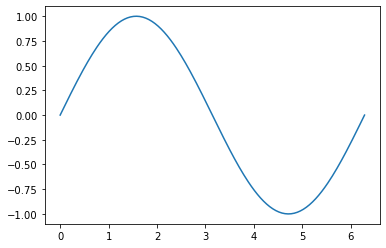

In [3]:
xv = np.linspace(0,2*np.pi,200)
yv = np.sin(xv)

plt.plot(xv,yv)

We see the plot not because it's the return value of `plt.plot`, but because we're in a notebook environment.  Any cell that makes a matplotlib figure will display it below.

## A more complete line plot example

Set up a `plt.figure`, actually ask for it to be shown with `plt.show()`.

Specify a size and resolution (DPI).

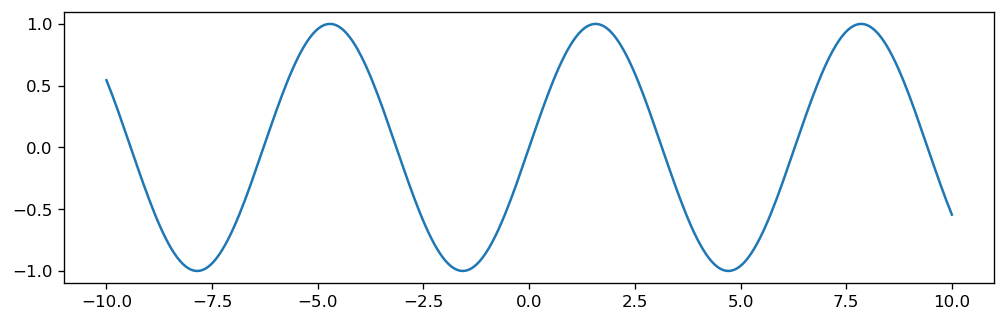

In [6]:
# create figure
plt.figure(figsize=(10,3),dpi=120)


xv = np.linspace(10,-10,300)

# add stuff to it
plt.plot(xv,np.sin(xv))

# see it
plt.show()

## Line plots and markers

The plot above is actually just a series of line segments.  That becomes evident if we decrease the number of data points.

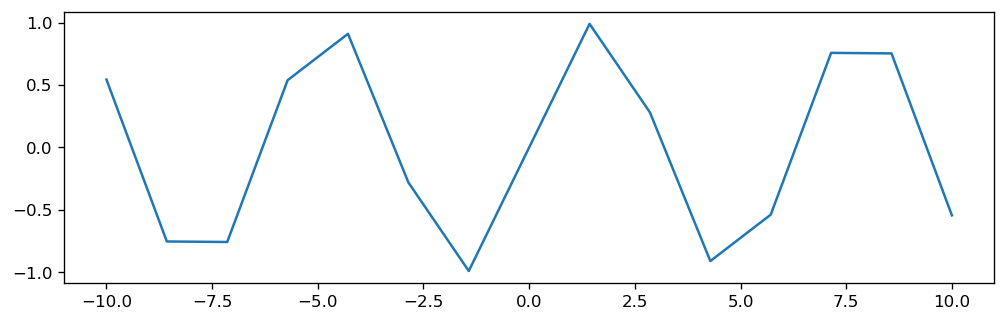

In [7]:
# create figure
plt.figure(figsize=(10,3),dpi=120)


xv = np.linspace(10,-10,15)

# add stuff to it
plt.plot(xv,np.sin(xv))

# see it
plt.show()

In many cases it's a good idea to explicitly mark each data point, so sparseness of data and potential inaccuracy of the line segments becomes evident.

You can pass `marker="x"` to put a small `x` over each data point.  Or `marker="o"` to put a dot.  There are [lots of other markers](https://matplotlib.org/stable/api/markers_api.html).

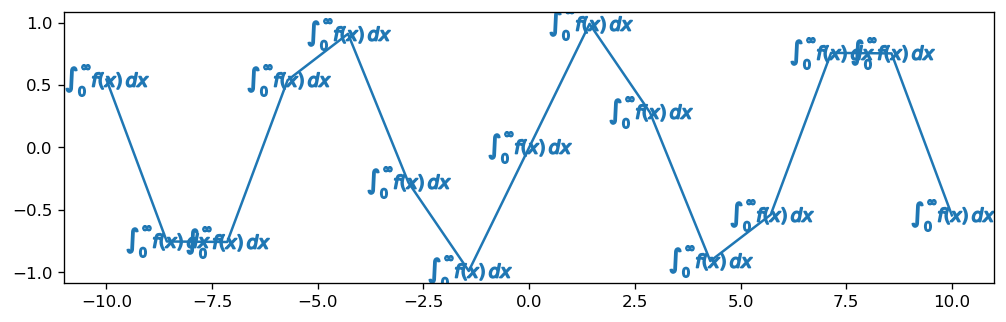

In [17]:
# create figure
plt.figure(figsize=(10,3),dpi=120)


xv = np.linspace(10,-10,15)

# add stuff to it
plt.plot(xv,np.sin(xv),marker="$\int_0^\infty f(x)\,dx$",markersize=50)

# see it
plt.show()

Passing `linestyle="none"` as another kwarg of `plt.plot`, we can omit the line entirely.

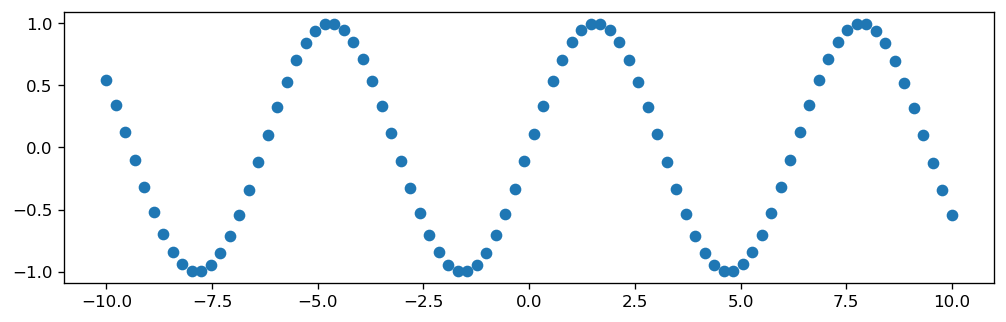

In [15]:
# create figure
plt.figure(figsize=(10,3),dpi=120)


xv = np.linspace(10,-10,90)

# add stuff to it
plt.plot(xv,np.sin(xv),marker="o",linestyle="none")

# see it
plt.show()

## Multiple functions

Call `plt.plot` several times and each set of data will be shown on the same axes.  They don't need to use a common array of `x` coordinates.  You can mix different ranges and numbers of data points.

$$ 1.3 e^{-5(x-2)^2}$$

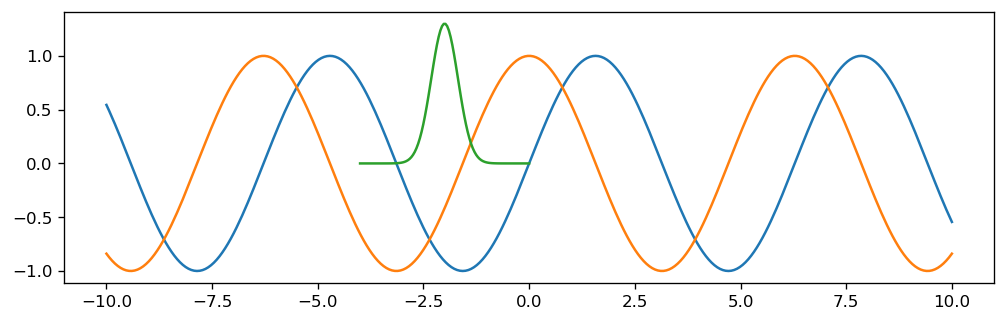

In [20]:
# create figure
plt.figure(figsize=(10,3),dpi=120)


x = np.linspace(10,-10,300)
x2 = np.linspace(-4,0,100)


# add stuff to it
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

plt.plot(x2,1.3*np.exp(-5*(x2+2)**2))

# see it
plt.show()

## Line colors and styles

`plt.plot` accepts `color`, `linestyle`, `linewidth` kwargs

Matplotlib can use hex colors or any of a large selection of [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html).

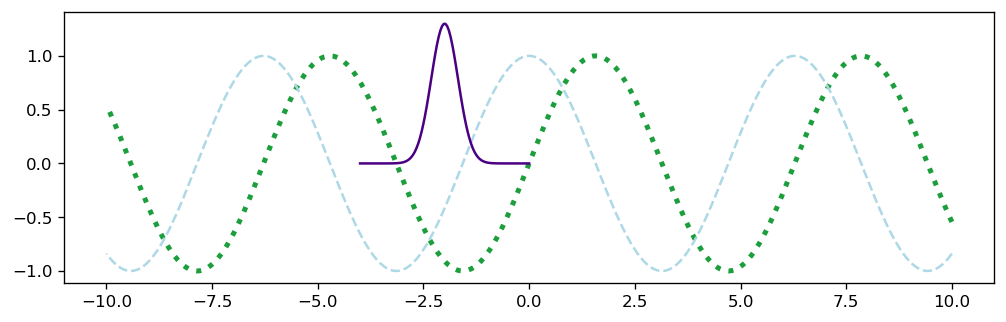

In [23]:
# create figure
plt.figure(figsize=(10,3),dpi=120)


x = np.linspace(10,-10,300)
x2 = np.linspace(-4,0,100)


# add stuff to it
plt.plot(x,np.sin(x),color="#1c9e3d",linestyle="dotted",linewidth=3)
plt.plot(x,np.cos(x),color="lightblue",linestyle="dashed")
plt.plot(x2,1.3*np.exp(-5*(x2+2)**2),color="indigo",linestyle="solid")

# see it
plt.show()

## Adjusting axes

`plt.xlim` and `plt.ylim`

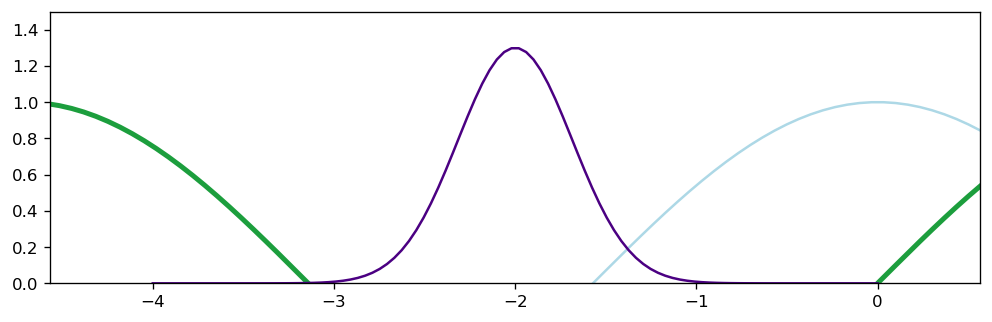

In [26]:
# create figure
plt.figure(figsize=(10,3),dpi=120)


x = np.linspace(10,-10,300)
x2 = np.linspace(-4,0,100)


# add stuff to it
plt.plot(x,np.sin(x),color="#1c9e3d",linewidth=3)
plt.plot(x,np.cos(x),color="lightblue")
plt.plot(x2,1.3*np.exp(-5*(x2+2)**2),color="indigo",linestyle="solid")

plt.axis("equal")
plt.xlim(-4,0)
plt.ylim(0,1.5)

# see it
plt.show()

## Parametric plot

Just make `x` and `y` both arrays computed from a third one.  Or do those computations directly in the call to `plt.plot`.

Also, `plt.axis("equal")` makes unit size in vertical and horizontal directions the same.

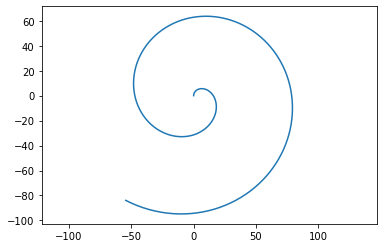

In [27]:
t = np.linspace(0,10,200)

x = 10*t*np.sin(t)
y = 10*t*np.cos(t)

plt.plot(x,y)
plt.axis("equal")

# see it
plt.show()

## Non-even spacing of `x` values

$y = \sin(1/x)$ has lots of fast motion near $x=0$, but slow change elsewhere.  A naive attempt to plot it gives poor results.

We could just use many more sample points, though that's wasteful in the places where the function varies slowly.

Another option is to use values of $x$ that are not evenly spaced: put them closer together near $x=0$ and more spaced out for larger $x$.

If we put markers on this last one, we'll see that most of the data points are at very small values of $x$.

## Line plots can lie

If you plot $\tan(x)$, the poles are not recognized.  Instead, you get a continuous line plot.

If you restrict the y range it looks a little better, but the vertical lines are still lies!  It's not a continuous curve.  But matplotlib knows nothing about the function you used---it only sees a list of values.

One fix is to plot on each interval of continuity separately.  Another is to eliminate curves entirely and just draw the points, spacing them closely so it's easy to spot continuity/discontinuity.

## Plot labels and legends

Labels give names to axes and plots. (`plt.xlabel`, `plt.ylabel`)

Plots can also have titles. (`plt.title`)

A legend shows the names of the plots in a figure.

## Saving plot as an image

`plt.savefig(filename)` does it.  Run it **before** `plot.show()`, or don't call `plt.show()` at all.

## Scatter plots

### Make with `plt.plot`: Same color and marker size for each point

In [ ]:
# sample data: four characteristics of the same list of objects
n = np.array([1,1.5,2,2.5,3.5,5])
t = np.array([1.8,2.6,3.5,4.9,8.8,8.2])
s = np.array([0.1,0.1,0.1,0.2,0.2,0.5])
c = np.array([1,2,3,5,8,20])

In [ ]:
# Use `n` as x axis and `t` as y axis.  Draw dots.
plt.plot(n,t,linestyle="none",marker="o")
plt.xlabel("n")
plt.ylabel("t")

In [ ]:
plt.plot(n,s,linestyle="none",marker="o")
plt.xlabel("n")
plt.ylabel("s")

### Make with `plt.scatter`: Can specify size and color for each point

You pass `x` and `y` arrays as usual,  but then the kwarg `s` can set an array of sizes.  And kwarg `c` sets an array of scalars that map to colors.

kwarg `cmap` selects colormap.  `plt.colorbar()` adds a color bar.  `plt.colormaps()` shows available ones.

In [ ]:
# Show the available color maps
plt.colormaps()

## Scatter plot real world data

CSV with data about meteorites recovered on earth's surface, adapted from a NASA dataset:
* [meteorites.csv](https://www.dumas.io/teaching/2022/spring/mcs275/data/meteorites.csv)

Let's load it into a dictionary mapping column names to lists of values (thanks, `defaultdict`!) and then make some plots.

For this dataset it turns out sizing by $0.002 m^{2/3}$ is a good choice.

kwarg `alpha` can make the markers partially transparent.

In [ ]:
import csv
import collections

columns = collections.defaultdict(list)

with open("meteorites.csv","r",newline="",encoding="UTF-8") as fp:
    reader = csv.DictReader(fp)
    for row in reader:
        # row is now a dictionary like {"latitude":"12.1", "longitude": "78.7", "mass": "15.5", "year": "1912"}
        for colname in row:
            # columns["latitude"].append(12.1)
            if colname == "year":
                x = int(row[colname])
            else:
                x = float(row[colname])
            columns[colname].append(x)
            
for colname in columns:
    columns[colname] = np.array( columns[colname] )

In [ ]:
columns

Let's try the same thing with `plt.scatter` so we can show additional data about each point through color and size.